In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('C:/Users/Thiyaneswaran_Manoha/Downloads/insurance_part2_data-2.csv') 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
print("Top 5 rows",data.head())

Top 5 rows    Age Agency_Code           Type Claimed  Commision Channel  Duration  Sales  \
0   48         C2B       Airlines      No       0.70  Online         7   2.51   
1   36         EPX  Travel Agency      No       0.00  Online        34  20.00   
2   39         CWT  Travel Agency      No       5.94  Online         3   9.90   
3   36         EPX  Travel Agency      No       0.00  Online         4  26.00   
4   33         JZI       Airlines      No       6.30  Online        53  18.00   

        Product Name Destination  
0    Customised Plan        ASIA  
1    Customised Plan        ASIA  
2    Customised Plan    Americas  
3  Cancellation Plan        ASIA  
4        Bronze Plan        ASIA  


In [3]:
print(data.duplicated().sum())

139


In [4]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print("Before removing Outlier sum\n",((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum())

def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range
for feature in data[['Age','Commision','Duration','Sales']]: 
    lr,ur=treat_outlier(data[feature])
    data[feature]=np.where(data[feature]>ur,ur,data[feature])
    data[feature]=np.where(data[feature]<lr,lr,data[feature])

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print("After removing Outlier sum\n",((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum())

Before removing Outlier sum
 Age             204
Agency_Code       0
Channel           0
Claimed           0
Commision       362
Destination       0
Duration        382
Product Name      0
Sales           353
Type              0
dtype: int64
After removing Outlier sum
 Age             0
Agency_Code     0
Channel         0
Claimed         0
Commision       0
Destination     0
Duration        0
Product Name    0
Sales           0
Type            0
dtype: int64


In [5]:
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        data[feature] = pd.Categorical(data[feature]).codes
print("ObjtoInt Info\n",data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null float64
Agency_Code     3000 non-null int8
Type            3000 non-null int8
Claimed         3000 non-null int8
Commision       3000 non-null float64
Channel         3000 non-null int8
Duration        3000 non-null float64
Sales           3000 non-null float64
Product Name    3000 non-null int8
Destination     3000 non-null int8
dtypes: float64(4), int8(6)
memory usage: 111.4 KB
ObjtoInt Info
 None


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


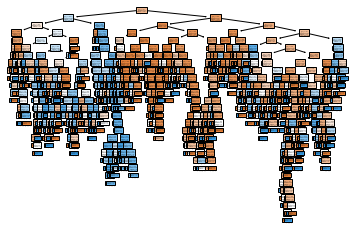

In [6]:
X = data.drop('Claimed' , axis=1)
y = data.pop('Claimed')
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=0.3, random_state=1)
dt_model = DecisionTreeClassifier(criterion = 'gini')
dtmodelfit=dt_model.fit(X_train, train_labels)
print(dt_model.fit(X_train, train_labels))
plot_tree(dtmodelfit, filled=True)
plt.show()

In [7]:
            param_grid = {
            'max_depth': [7, 8, 9, 10],
            'min_samples_leaf': [15, 20, 25],
            'min_samples_split': [45, 60, 75]
            }
            reg_dt_model = DecisionTreeClassifier()
            grid_search = GridSearchCV(estimator = reg_dt_model, param_grid = param_grid, cv = 3)
            print("grid search\n",grid_search)
            grid_search.fit(X_train, train_labels)
            print("grid search fit\n",grid_search.fit(X_train, train_labels))
            print("grid search best params\n",grid_search.best_params_)
            best_grid = grid_search.best_estimator_
            print("best grid\n",best_grid)
            ytrain_predict = best_grid.predict(X_train)
            ytest_predict = best_grid.predict(X_test)

grid search
 GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [7, 8, 9, 10],
                         'min_samples_leaf': [15, 20, 25],
           

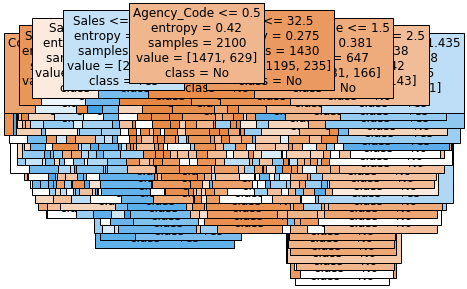

                  Imps
Age           0.181907
Agency_Code   0.208292
Type          0.002067
Commision     0.081665
Channel       0.007550
Duration      0.250714
Sales         0.204498
Product Name  0.040376
Destination   0.022930


In [8]:
        train_char_label = ['No', 'Yes']
        Credit_Tree_File = open('C:/Users/Thiyaneswaran_Manoha/Downloads/tree1.dot','w')
        dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
        Credit_Tree_File.close()
#         call(['dot', '-Tpng', treepath, '-o', treepathpng, '-Gdpi=600'])
#         Image(filename = treepathpng)
        plot_tree(dt_model, feature_names = list(X_train),class_names = list(train_char_label),fontsize=12,filled=True)
        plt.show()
        print (pd.DataFrame(dt_model.feature_importances_, columns = ['Imps'], index = X_train.columns))
        global y_predict
        y_predict = dt_model.predict(X_test)

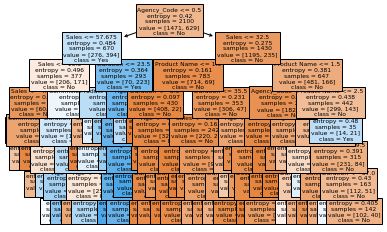

              Important
Age            0.181907
Agency_Code    0.208292
Type           0.002067
Commision      0.081665
Channel        0.007550
Duration       0.250714
Sales          0.204498
Product Name   0.040376
Destination    0.022930


<Figure size 432x288 with 0 Axes>

In [19]:
            train_char_label = ['No', 'Yes']
            reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=20,min_samples_split=45)
            reg_dt_model.fit(X_train, train_labels)
            credit_tree_regularized = open('C:/Users/Thiyaneswaran_Manoha/Downloads/regtree1.dot','w')
            dot_data = tree.export_graphviz(reg_dt_model, out_file= credit_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))
            credit_tree_regularized.close()
            plot_tree(reg_dt_model, feature_names = list(X_train),class_names = list(train_char_label),fontsize=6,filled=True)
            plt.show()
            plt.savefig('file.png')
            print (pd.DataFrame(dt_model.feature_importances_, columns = ['Important'], index = X_train.columns))
            ytrain_predict = reg_dt_model.predict(X_train)
            ytest_predict = reg_dt_model.predict(X_test)
            

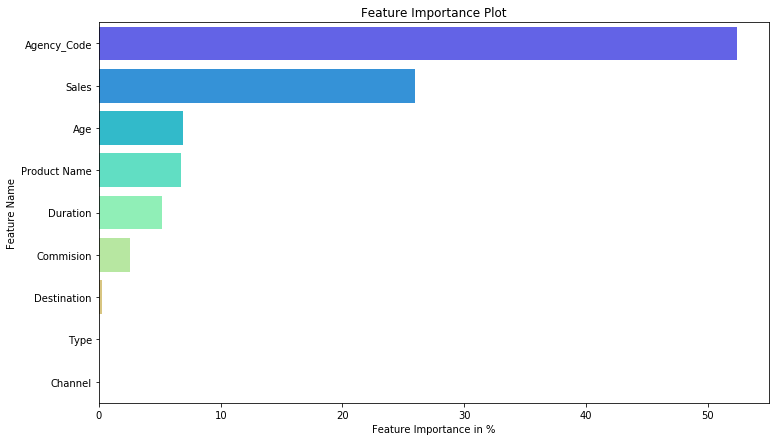

In [20]:
x=pd.DataFrame(reg_dt_model.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1471
           1       0.69      0.66      0.67       629

    accuracy                           0.81      2100
   macro avg       0.77      0.76      0.77      2100
weighted avg       0.80      0.81      0.81      2100



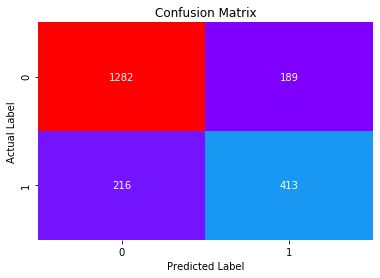

In [21]:
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
print(classification_report(train_labels,ytrain_predict))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       605
           1       0.68      0.52      0.59       295

    accuracy                           0.76       900
   macro avg       0.73      0.70      0.71       900
weighted avg       0.75      0.76      0.75       900



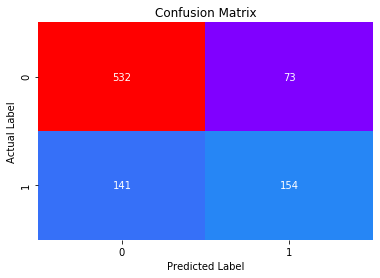

In [22]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
print(classification_report(test_labels,ytest_predict))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

AUC: 0.862


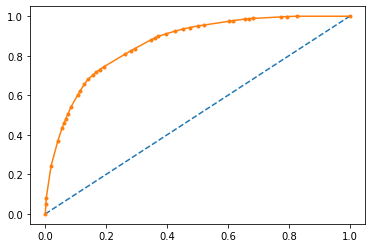

In [23]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.786


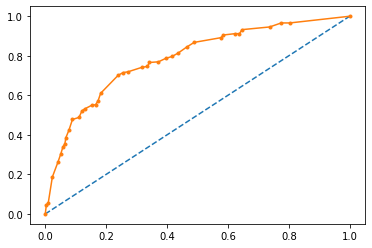

In [24]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.862


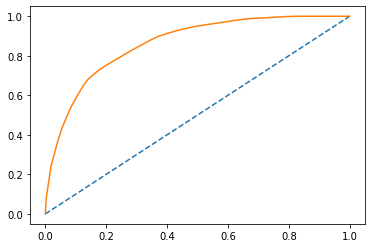

In [25]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

AUC: 0.786


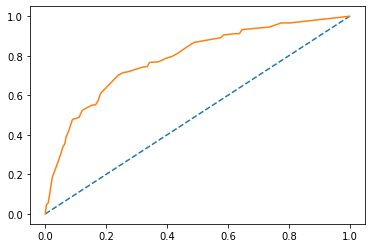

In [26]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

In [27]:
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,train_labels) 
print(cart_train_acc)
print(classification_report(train_labels, ytrain_predict))
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(df.loc["1"][1],2)
cart_train_recall=round(df.loc["1"][2],2)
cart_train_f1=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

[[1282  189]
 [ 216  413]]
0.8071428571428572
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1471
           1       0.69      0.66      0.67       629

    accuracy                           0.81      2100
   macro avg       0.77      0.76      0.77      2100
weighted avg       0.80      0.81      0.81      2100

cart_train_precision  0.69
cart_train_recall  0.66
cart_train_f1  0.67


In [28]:
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
print(cart_test_acc)
print(classification_report(test_labels, ytest_predict))
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][1],2)
cart_test_recall=round(df.loc["1"][2],2)
cart_test_f1=round(df.loc["1"][0],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

[[532  73]
 [141 154]]
0.7622222222222222
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       605
           1       0.68      0.52      0.59       295

    accuracy                           0.76       900
   macro avg       0.73      0.70      0.71       900
weighted avg       0.75      0.76      0.75       900

cart_test_precision  0.68
cart_test_recall  0.52
cart_test_f1  0.59


In [68]:
            param_grid = {
        'max_depth': [5,7,10],
        'max_features': [4,6],
        'min_samples_leaf': [5,10],
        'min_samples_split': [50,100],
        'n_estimators': [100,200,300]
            }
            reg_dt_model = RandomForestClassifier()
            grid_search = GridSearchCV(estimator = reg_dt_model, param_grid = param_grid, cv = 3)
            print("grid search\n",grid_search)
            grid_search.fit(X_train, train_labels)
            print("grid search fit\n",grid_search.fit(X_train, train_labels))
            print("grid search best params\n",grid_search.best_params_)
            best_grid = grid_search.best_estimator_
            print("best grid\n",best_grid)
            ytrain_predict = best_grid.predict(X_train)
            ytest_predict = best_grid.predict(X_test)

grid search
 GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
   

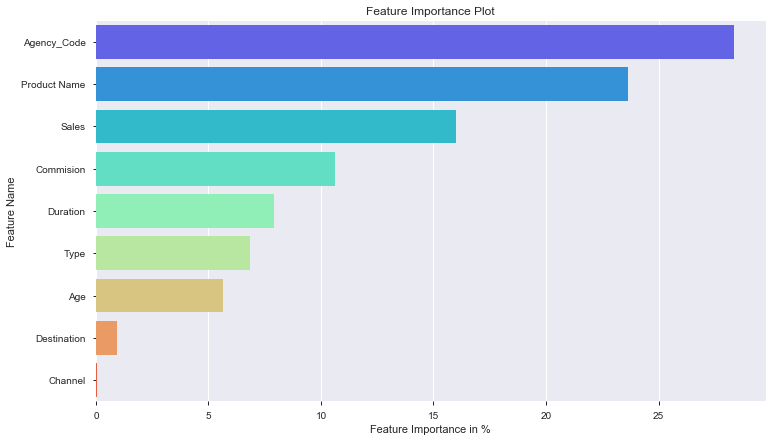

In [69]:
reg_dt_model1 = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=7,max_features=4,min_samples_leaf=10,min_samples_split=50)
reg_dt_model1.fit(X_train, train_labels)
ytrain_predict1 = reg_dt_model1.predict(X_train)
ytest_predict1 = reg_dt_model1.predict(X_test)
x=pd.DataFrame(reg_dt_model1.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1471
           1       0.72      0.60      0.66       629

    accuracy                           0.81      2100
   macro avg       0.78      0.75      0.76      2100
weighted avg       0.80      0.81      0.81      2100



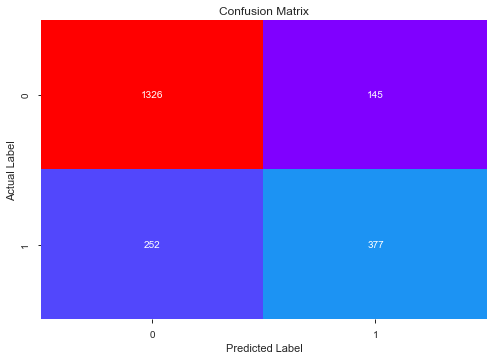

In [70]:
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
print(classification_report(train_labels,ytrain_predict))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       605
           1       0.74      0.48      0.58       295

    accuracy                           0.77       900
   macro avg       0.76      0.70      0.72       900
weighted avg       0.77      0.77      0.76       900



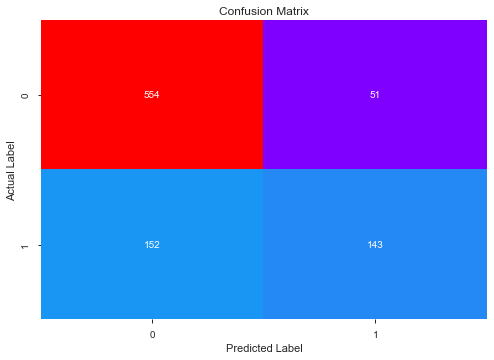

In [71]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
print(classification_report(test_labels,ytest_predict))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [72]:
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
rf_train_acc=best_grid.score(X_train,train_labels) 
print(rf_train_acc)
print(classification_report(train_labels, ytrain_predict))
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][1],2)
rf_train_recall=round(df.loc["1"][2],2)
rf_train_f1=round(df.loc["1"][0],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

[[1326  145]
 [ 252  377]]
0.810952380952381
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1471
           1       0.72      0.60      0.66       629

    accuracy                           0.81      2100
   macro avg       0.78      0.75      0.76      2100
weighted avg       0.80      0.81      0.81      2100

rf_train_precision  0.72
rf_train_recall  0.6
rf_train_f1  0.66


In [73]:
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
rf_test_acc=best_grid.score(X_test,test_labels)
print(rf_test_acc)
print(classification_report(test_labels, ytest_predict))
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][1],2)
rf_test_recall=round(df.loc["1"][2],2)
rf_test_f1=round(df.loc["1"][0],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

[[554  51]
 [152 143]]
0.7744444444444445
              precision    recall  f1-score   support

           0       0.78      0.92      0.85       605
           1       0.74      0.48      0.58       295

    accuracy                           0.77       900
   macro avg       0.76      0.70      0.72       900
weighted avg       0.77      0.77      0.76       900

rf_test_precision  0.74
rf_test_recall  0.48
rf_test_f1  0.58


Area under Curve is 0.7503958351121146


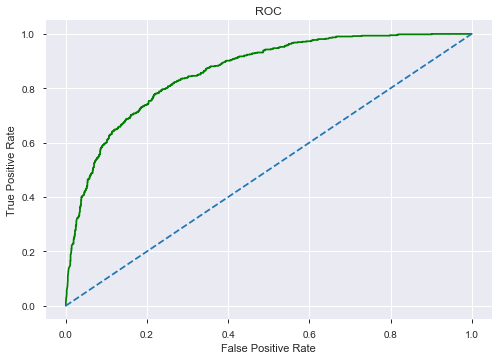

In [74]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict(X_train))
print('Area under Curve is', rf_train_auc)

Area under Curve is 0.7002241210253538


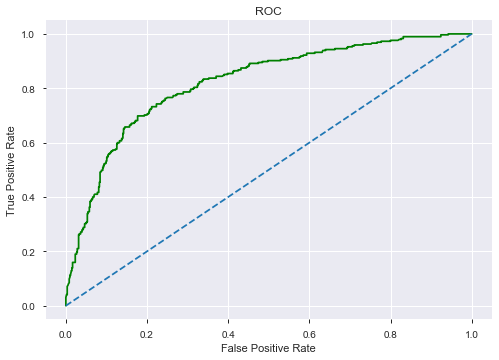

In [75]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict(X_test))
print('Area under Curve is', rf_test_auc)

AUC: 0.861


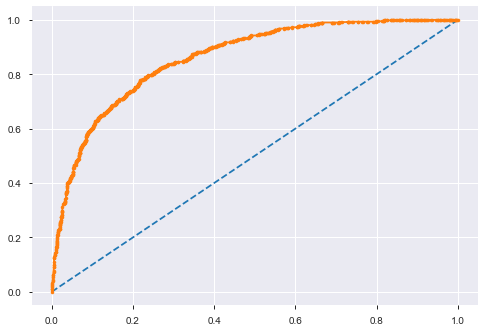

In [76]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.821


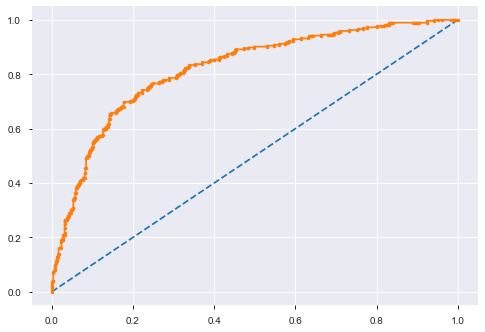

In [77]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [39]:
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [40]:
            param_grid = {
            'hidden_layer_sizes': [(100,100,100)],
            'activation': ['logistic', 'relu'],
            'solver': ['sgd', 'adam'],
            'tol': [0.1,0.01],
            'max_iter' : [10000]
            }
            reg_dt_model = MLPClassifier()
            grid_search = GridSearchCV(estimator = reg_dt_model, param_grid = param_grid, cv = 3)
            print("grid search\n",grid_search)
            grid_search.fit(X_trains, train_labels)
            print("grid search fit\n",grid_search.fit(X_trains, train_labels))
            print("grid search best params\n",grid_search.best_params_)
            best_grid = grid_search.best_estimator_
            print("best grid\n",best_grid)
            ytrain_predict = best_grid.predict(X_trains)
            ytest_predict = best_grid.predict(X_tests)

grid search
 GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'activation': ['logistic', '

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1471
           1       0.71      0.53      0.61       629

    accuracy                           0.79      2100
   macro avg       0.76      0.72      0.73      2100
weighted avg       0.79      0.79      0.79      2100



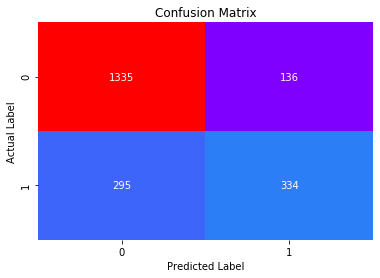

In [41]:
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
print(classification_report(train_labels,ytrain_predict))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       605
           1       0.72      0.43      0.54       295

    accuracy                           0.76       900
   macro avg       0.74      0.68      0.69       900
weighted avg       0.75      0.76      0.74       900



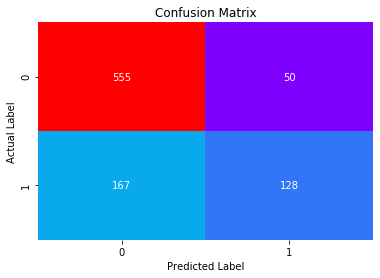

In [42]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
print(classification_report(test_labels,ytest_predict))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [43]:
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
nn_train_acc=best_grid.score(X_trains,train_labels) 
print(nn_train_acc)
print(classification_report(train_labels, ytrain_predict))
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][1],2)
nn_train_recall=round(df.loc["1"][2],2)
nn_train_f1=round(df.loc["1"][0],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

[[1335  136]
 [ 295  334]]
0.7947619047619048
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1471
           1       0.71      0.53      0.61       629

    accuracy                           0.79      2100
   macro avg       0.76      0.72      0.73      2100
weighted avg       0.79      0.79      0.79      2100

nn_train_precision  0.71
nn_train_recall  0.53
nn_train_f1  0.61


In [44]:
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
nn_test_acc=best_grid.score(X_tests,test_labels)
print(nn_test_acc)
print(classification_report(test_labels, ytest_predict))
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][1],2)
nn_test_recall=round(df.loc["1"][2],2)
nn_test_f1=round(df.loc["1"][0],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

[[555  50]
 [167 128]]
0.7588888888888888
              precision    recall  f1-score   support

           0       0.77      0.92      0.84       605
           1       0.72      0.43      0.54       295

    accuracy                           0.76       900
   macro avg       0.74      0.68      0.69       900
weighted avg       0.75      0.76      0.74       900

nn_test_precision  0.72
nn_test_recall  0.43
nn_test_f1  0.54


Area under Curve is 0.7192737384883584


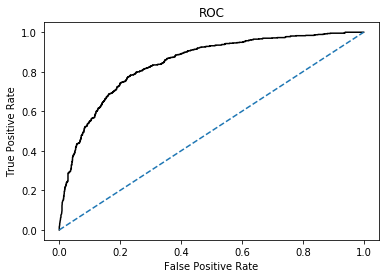

In [45]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_trains)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict(X_trains))
print('Area under Curve is', nn_train_auc)

Area under Curve is 0.6756268384927862


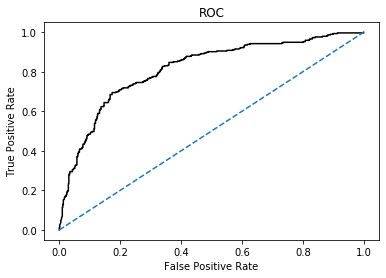

In [46]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_tests)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict(X_tests))
print('Area under Curve is', nn_test_auc)

AUC: 0.843


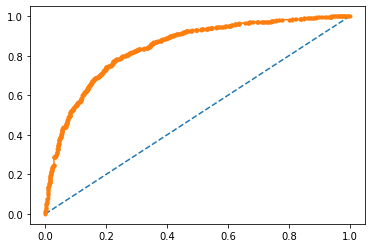

In [47]:
probs = best_grid.predict_proba(X_trains)
probs = probs[:, 1]
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.814


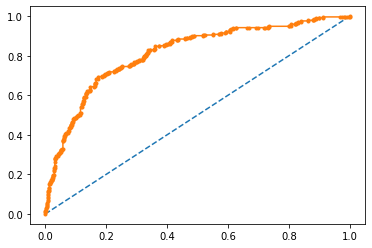

In [48]:
probs = best_grid.predict_proba(X_tests)
probs = probs[:, 1]
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [49]:
        param_grid = {
    'hidden_layer_sizes': [100,200,300,500],
    'max_iter': [5000,2500,7000,6000],
    'solver': ['sgd','adam'],
    'tol': [0.01],
        }
        nncl = MLPClassifier()
        sgd_grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)
        print(sgd_grid_search.fit(X_trains, train_labels))
        print("grid best parameters\n",sgd_grid_search.best_params_)
        sgd_best_grid = sgd_grid_search.best_estimator_
        print(sgd_best_grid)
        ytrain_best_predict = sgd_best_grid.predict(X_trains)
        ytest_best_predict = sgd_best_grid.predict(X_tests)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'hidden_layer_sizes': [100, 200, 300, 50

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1471
           1       0.68      0.54      0.60       629

    accuracy                           0.79      2100
   macro avg       0.75      0.72      0.73      2100
weighted avg       0.78      0.79      0.78      2100



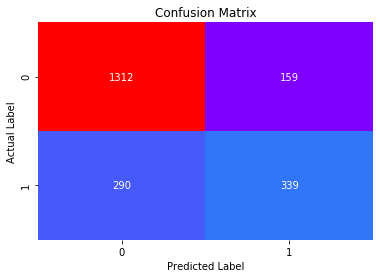

In [50]:
confusion_matrix(train_labels,ytrain_best_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_best_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
print(classification_report(train_labels,ytrain_best_predict))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [51]:
print(confusion_matrix(train_labels, ytrain_best_predict))
#Train Data Accuracy
nn_train_acc1=sgd_best_grid.score(X_trains,train_labels) 
print(nn_train_acc1)
print(classification_report(train_labels, ytrain_best_predict))
nn_metrics=classification_report(train_labels, ytrain_best_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision1=round(df.loc["1"][1],2)
nn_train_recall1=round(df.loc["1"][2],2)
nn_train_f11=round(df.loc["1"][0],2)
print ('nn_train_precision ',nn_train_precision1)
print ('nn_train_recall ',nn_train_recall1)
print ('nn_train_f1 ',nn_train_f11)

[[1312  159]
 [ 290  339]]
0.7861904761904762
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1471
           1       0.68      0.54      0.60       629

    accuracy                           0.79      2100
   macro avg       0.75      0.72      0.73      2100
weighted avg       0.78      0.79      0.78      2100

nn_train_precision  0.68
nn_train_recall  0.54
nn_train_f1  0.6


              precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.72      0.46      0.57       295

    accuracy                           0.77       900
   macro avg       0.75      0.69      0.70       900
weighted avg       0.76      0.77      0.75       900



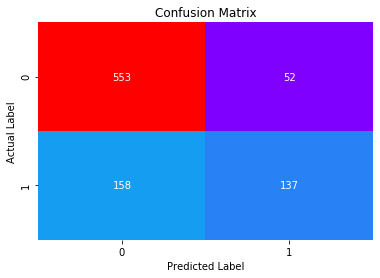

In [52]:
confusion_matrix(test_labels,ytest_best_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_best_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
print(classification_report(test_labels,ytest_best_predict))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [53]:
print(confusion_matrix(test_labels, ytest_best_predict))
#test Data Accuracy
nn_test_acc1=sgd_best_grid.score(X_tests,test_labels) 
print(nn_test_acc1)
print(classification_report(test_labels, ytest_best_predict))
nn_metrics=classification_report(test_labels, ytest_best_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision1=round(df.loc["1"][1],2)
nn_test_recall1=round(df.loc["1"][2],2)
nn_test_f11=round(df.loc["1"][0],2)
print ('nn_test_precision ',nn_test_precision1)
print ('nn_test_recall ',nn_test_recall1)
print ('nn_test_f1 ',nn_test_f11)

[[553  52]
 [158 137]]
0.7666666666666667
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       605
           1       0.72      0.46      0.57       295

    accuracy                           0.77       900
   macro avg       0.75      0.69      0.70       900
weighted avg       0.76      0.77      0.75       900

nn_test_precision  0.72
nn_test_recall  0.46
nn_test_f1  0.57


Area under Curve is 0.7154304902735342


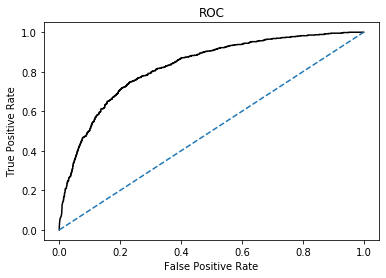

In [54]:
nn_train_fpr1, nn_train_tpr1,_=roc_curve(train_labels,sgd_best_grid.predict_proba(X_trains)[:,1])
plt.plot(nn_train_fpr1,nn_train_tpr1,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc1=roc_auc_score(train_labels,sgd_best_grid.predict(X_trains))
print('Area under Curve is', nn_train_auc1)

Area under Curve is 0.6892281832189383


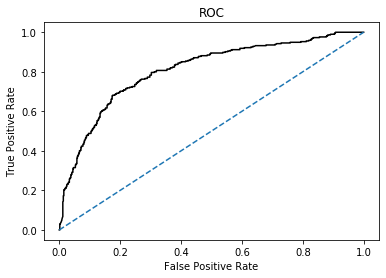

In [55]:
nn_test_fpr1, nn_test_tpr1,_=roc_curve(test_labels,sgd_best_grid.predict_proba(X_tests)[:,1])
plt.plot(nn_test_fpr1,nn_test_tpr1,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc1=roc_auc_score(test_labels,sgd_best_grid.predict(X_tests))
print('Area under Curve is', nn_test_auc1)

In [78]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
metdata = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train1':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test1':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1],
                       'Neural Network Train2':[nn_train_acc1,nn_train_auc1,nn_train_recall1,nn_train_precision1,nn_train_f11],
        'Neural Network Test2':[nn_test_acc1,nn_test_auc1,nn_test_recall1,nn_test_precision1,nn_test_f11]},index=index)
print(round(metdata,2))
metdata.T.to_csv('C:/Users/Thiyaneswaran_Manoha/Downloads/insurance_part2_data-2_metdata.csv')

           CART Train  CART Test  Random Forest Train  Random Forest Test  \
Accuracy         0.81       0.76                 0.81                0.77   
AUC              0.86       0.79                 0.75                0.70   
Recall           0.66       0.52                 0.60                0.48   
Precision        0.69       0.68                 0.72                0.74   
F1 Score         0.67       0.59                 0.66                0.58   

           Neural Network Train1  Neural Network Test1  Neural Network Train2  \
Accuracy                    0.79                  0.76                   0.79   
AUC                         0.72                  0.68                   0.72   
Recall                      0.53                  0.43                   0.54   
Precision                   0.71                  0.72                   0.68   
F1 Score                    0.61                  0.54                   0.60   

           Neural Network Test2  
Accuracy        

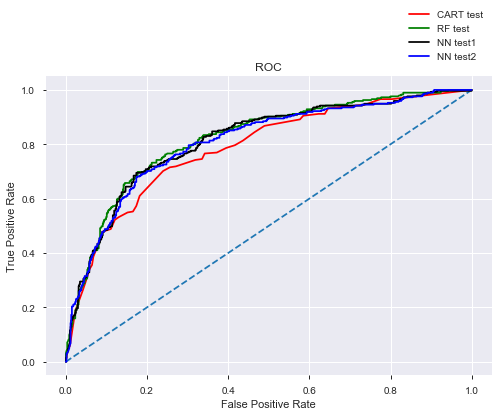

In [79]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART test")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF test")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN test1")
plt.plot(nn_test_fpr1,nn_test_tpr1,color='blue',label="NN test2")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

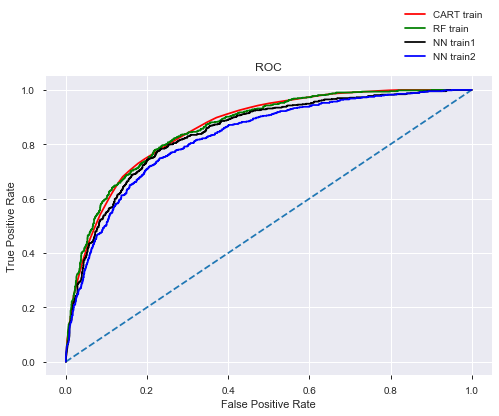

In [80]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART train")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF train")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN train1")
plt.plot(nn_train_fpr1,nn_train_tpr1,color='blue',label="NN train2")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [59]:
        data = pd.read_csv('C:/Users/Thiyaneswaran_Manoha/Downloads/insurance_part2_data-2.csv') 
        print("shape\n",data.shape) # see the shape of the data
        print("Info\n",data.info())
        print("Mean\n",data.mean())
        print("Mode\n",data.mode())
        print("median\n",data.median())
        print("data_quantile(25%):\n",data.quantile(q=0.25))
        print("data_quantile(50%):\n",data.quantile(q=0.50))
        print("data_quantile(75%):\n",data.quantile(q=0.75))
        print("describe\n",data.describe())
#         print("IQR\n",data.quantile(0.75) - data.quantile(0.25))
#         print("Range\n",data.max() - data.min())
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        print("Outlier sum\n",((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum())
        print("variance\n",data.var())
        print("std\n",data.std())
        print("cov\n",data.cov())
        print("corr\n",data.corr())
        print("skew\n",data.skew())
        print("kurt\n",data.kurt())
        print("nullcheck\n",data.isnull().sum())

shape
 (3000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null object
Type            3000 non-null object
Claimed         3000 non-null object
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB
Info
 None
Mean
 Age          38.091000
Commision    14.529203
Duration     70.001333
Sales        60.249913
dtype: float64
Mode
    Age Agency_Code           Type Claimed  Commision Channel  Duration  Sales  \
0   36         EPX  Travel Agency      No        0.0  Online         8   20.0   

      Product Name Destination  
0  Customised Plan        ASIA  
median
 Age          36.00
Commision     4.63
Duration     26.50
Sales        33.0

In [60]:
import pandas_profiling
df = pd.read_csv('C:/Users/Thiyaneswaran_Manoha/Downloads/insurance_part2_data-2.csv')
profile = df.profile_report(title='Insurance+Part2')
profile.to_file(output_file="C:/Users/Thiyaneswaran_Manoha/Downloads/insurance_part2_data-2_1.html")

In [63]:
import pandas_profiling
data = pd.read_csv('C:/Users/Thiyaneswaran_Manoha/Downloads/insurance_part2_data-2.csv')

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print("Before removing Outlier sum\n",((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum())

def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range
for feature in data[['Age','Commision','Duration','Sales']]: 
    lr,ur=treat_outlier(data[feature])
    data[feature]=np.where(data[feature]>ur,ur,data[feature])
    data[feature]=np.where(data[feature]<lr,lr,data[feature])

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print("After removing Outlier sum\n",((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum())

profile = data.profile_report(title='Insurance+Part2')
profile.to_file(output_file="C:/Users/Thiyaneswaran_Manoha/Downloads/insurance_part2_data-2_clean.html")

Before removing Outlier sum
 Age             204
Agency_Code       0
Channel           0
Claimed           0
Commision       362
Destination       0
Duration        382
Product Name      0
Sales           353
Type              0
dtype: int64
After removing Outlier sum
 Age             0
Agency_Code     0
Channel         0
Claimed         0
Commision       0
Destination     0
Duration        0
Product Name    0
Sales           0
Type            0
dtype: int64


In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('C:/Users/Thiyaneswaran_Manoha/Downloads/insurance_part2_data-2.csv') 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
print("Top 5 rows",data.head())

Top 5 rows    Age Agency_Code           Type Claimed  Commision Channel  Duration  Sales  \
0   48         C2B       Airlines      No       0.70  Online         7   2.51   
1   36         EPX  Travel Agency      No       0.00  Online        34  20.00   
2   39         CWT  Travel Agency      No       5.94  Online         3   9.90   
3   36         EPX  Travel Agency      No       0.00  Online         4  26.00   
4   33         JZI       Airlines      No       6.30  Online        53  18.00   

        Product Name Destination  
0    Customised Plan        ASIA  
1    Customised Plan        ASIA  
2    Customised Plan    Americas  
3  Cancellation Plan        ASIA  
4        Bronze Plan        ASIA  


In [3]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print("Before removing Outlier sum\n",((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum())

def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range
for feature in data[['Age','Commision','Duration','Sales']]: 
    lr,ur=treat_outlier(data[feature])
    data[feature]=np.where(data[feature]>ur,ur,data[feature])
    data[feature]=np.where(data[feature]<lr,lr,data[feature])

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print("After removing Outlier sum\n",((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum())

Before removing Outlier sum
 Age             204
Agency_Code       0
Channel           0
Claimed           0
Commision       362
Destination       0
Duration        382
Product Name      0
Sales           353
Type              0
dtype: int64
After removing Outlier sum
 Age             0
Agency_Code     0
Channel         0
Claimed         0
Commision       0
Destination     0
Duration        0
Product Name    0
Sales           0
Type            0
dtype: int64


In [4]:
for feature in data.columns: 
    if data[feature].dtype == 'object': 
        data[feature] = pd.Categorical(data[feature]).codes
print("ObjtoInt Info\n",data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null float64
Agency_Code     3000 non-null int8
Type            3000 non-null int8
Claimed         3000 non-null int8
Commision       3000 non-null float64
Channel         3000 non-null int8
Duration        3000 non-null float64
Sales           3000 non-null float64
Product Name    3000 non-null int8
Destination     3000 non-null int8
dtypes: float64(4), int8(6)
memory usage: 111.4 KB
ObjtoInt Info
 None


In [5]:
X = data.drop('Claimed' , axis=1)
y = data.pop('Claimed')
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=0.3, random_state=1)

In [8]:
            param_grid = {
            'hidden_layer_sizes': [(100,100,100)],
            'activation': ['logistic', 'relu'],
            'solver': ['sgd', 'adam'],
            'tol': [0.1,0.01],
            'max_iter' : [10000]
            }
            reg_dt_model = MLPClassifier()
            grid_search = GridSearchCV(estimator = reg_dt_model, param_grid = param_grid, cv = 3)
            print("grid search\n",grid_search)
            grid_search.fit(X_train, train_labels)
            print("grid search fit\n",grid_search.fit(X_train, train_labels))
            print("grid search best params\n",grid_search.best_params_)
            best_grid = grid_search.best_estimator_
            print("best grid\n",best_grid)
            ytrain_predict = best_grid.predict(X_train)
            ytest_predict = best_grid.predict(X_test)

grid search
 GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'activation': ['logistic', '

In [10]:
print(confusion_matrix(train_labels, ytrain_predict))
#Train Data Accuracy
nn_train_acc=best_grid.score(X_train,train_labels) 
print(nn_train_acc)
print(classification_report(train_labels, ytrain_predict))
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][1],2)
nn_train_recall=round(df.loc["1"][2],2)
nn_train_f1=round(df.loc["1"][0],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

[[1392   79]
 [ 392  237]]
0.7757142857142857
              precision    recall  f1-score   support

           0       0.78      0.95      0.86      1471
           1       0.75      0.38      0.50       629

    accuracy                           0.78      2100
   macro avg       0.77      0.66      0.68      2100
weighted avg       0.77      0.78      0.75      2100

nn_train_precision  0.75
nn_train_recall  0.38
nn_train_f1  0.5


In [11]:
print(confusion_matrix(test_labels, ytest_predict))
#Test Data Accuracy
nn_test_acc=best_grid.score(X_test,test_labels)
print(nn_test_acc)
print(classification_report(test_labels, ytest_predict))
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][1],2)
nn_test_recall=round(df.loc["1"][2],2)
nn_test_f1=round(df.loc["1"][0],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

[[578  27]
 [206  89]]
0.7411111111111112
              precision    recall  f1-score   support

           0       0.74      0.96      0.83       605
           1       0.77      0.30      0.43       295

    accuracy                           0.74       900
   macro avg       0.75      0.63      0.63       900
weighted avg       0.75      0.74      0.70       900

nn_test_precision  0.77
nn_test_recall  0.3
nn_test_f1  0.43


Area under Curve is 0.6615417953243362


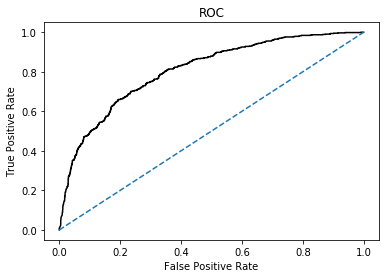

In [12]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict(X_train))
print('Area under Curve is', nn_train_auc)

Area under Curve is 0.6285334080403417


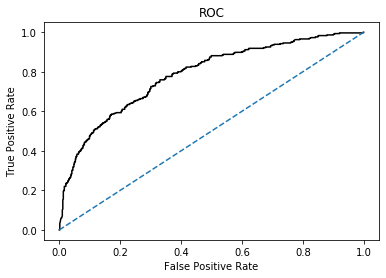

In [13]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict(X_test))
print('Area under Curve is', nn_test_auc)

In [14]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
metdata = pd.DataFrame({
       'Neural Network Train1':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test1':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]
            },index=index)
print(round(metdata,2))
metdata.T.to_csv('C:/Users/Thiyaneswaran_Manoha/Downloads/insurance_part2_data-2_metdata_noscaling.csv')

           Neural Network Train1  Neural Network Test1
Accuracy                    0.78                  0.74
AUC                         0.66                  0.63
Recall                      0.38                  0.30
Precision                   0.75                  0.77
F1 Score                    0.50                  0.43
